In [1]:
#importing all the libries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import pydot

Using TensorFlow backend.


In [2]:
# using iris data set 
dataset= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [3]:
dataset

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#Paramentre k0,k1
X= dataset.iloc[:,0:4].values
Y = dataset.iloc[:,4].values

In [5]:
#to convert all numerical values to numbers 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(Y) 
Y = pd.get_dummies(y1).values # to convert it into matrix 

In [6]:
# to split the mode 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [27]:
print(x_train.shape , x_test.shape)

(120, 4) (30, 4)


In [28]:
print(y_train.shape , y_test.shape)

(120, 3) (30, 3)


In [36]:
# model using ANN wiht 1 hidder layer with linear activation function and o/p as softmax activation function
model = Sequential()
model.add(Dense(4,input_shape=(4,), activation ='relu')) # singel hidden layer 
model.add(Dense(3, activation='softmax'))  # output laver
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [8]:
# complining the ann using categorical_crossentropy loss function 
model.compile(optimizer = 'Adam',loss ='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train,batch_size=10 ,nb_epoch=100)

/home/wajoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
120/120 [==============================] - 0s 4ms/step - loss: 1.4830 - accuracy: 0.6333
Epoch 2/100
120/120 [==============================] - 0s 459us/step - loss: 1.3918 - accuracy: 0.6333
Epoch 3/100
120/120 [==============================] - 0s 414us/step - loss: 1.3096 - accuracy: 0.6333
Epoch 4/100
120/120 [==============================] - 0s 335us/step - loss: 1.2445 - accuracy: 0.6333
Epoch 5/100
120/120 [==============================] - 0s 677us/step - loss: 1.1852 - accuracy: 0.6250
Epoch 6/100
120/120 [==============================] - 0s 337us/step - loss: 1.1432 - accuracy: 0.6167
Epoch 7/100
120/120 [==============================] - 0s 567us/step - loss: 1.1052 - accuracy: 0.6083
Epoch 8/100
120/120 [==============================] - 0s 508us/step - loss: 1.0755 - accuracy: 0.6000
Epoch 9/100
120/120 [==============================] - 0s 539us/step - loss: 1.0517 - accuracy: 0.5750
Epoch 10/100
120/120 [==============================] - 0s 442us/step - los

In [34]:
print(x_train)

[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]
 [5.2 2.7 3.9 1.4]
 [5.7 3.8 1.7 0.3]
 [6.  2.7 5.1 1.6]
 [5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.

In [25]:
y_pred =model.predict(x_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis = 1)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.00      0.00      0.00        13
           2       0.32      1.00      0.48         6

    accuracy                           0.57        30
   macro avg       0.44      0.67      0.49        30
weighted avg       0.43      0.57      0.46        30

[[11  0  0]
 [ 0  0 13]
 [ 0  0  6]]


/home/wajoud/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
history = model.fit(x_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

In [16]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


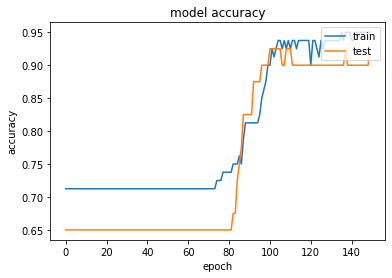

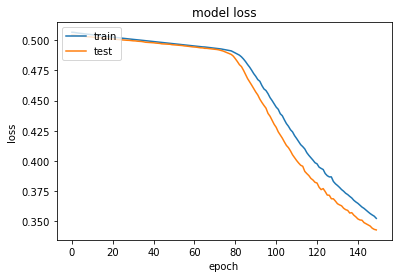

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()